<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Helium_Mobius_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ζ    En(alpha=0)    Eanalytic
1.30  -2.433679   -2.697500
1.40  -2.499842   -2.765000
1.50  -2.563169   -2.812500
1.60  -2.623718   -2.840000
1.70  -2.681537   -2.847500
1.80  -2.736666   -2.835000
1.90  -2.789138   -2.802500
2.00  -2.838983   -2.750000
2.10  -2.886225   -2.677500


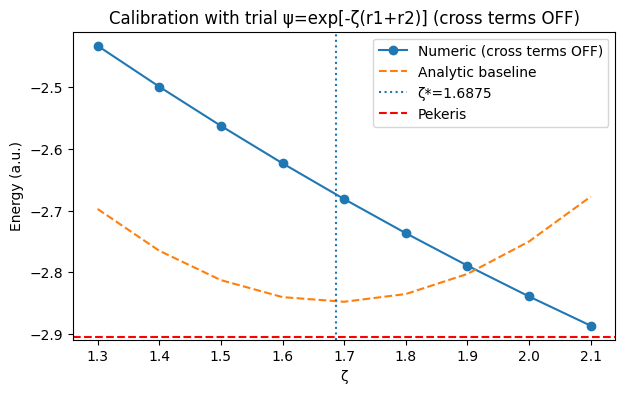

ζ=1.50  Singlet=-11.679501  Triplet=-5.695692
ζ=1.60  Singlet=-12.754697  Triplet=-5.950637
ζ=1.70  Singlet=-13.883821  Triplet=-6.205299
ζ=1.80  Singlet=-15.067147  Triplet=-6.459702
ζ=1.90  Singlet=-16.305119  Triplet=-6.713869
ζ=2.00  Singlet=-17.598334  Triplet=-6.967821


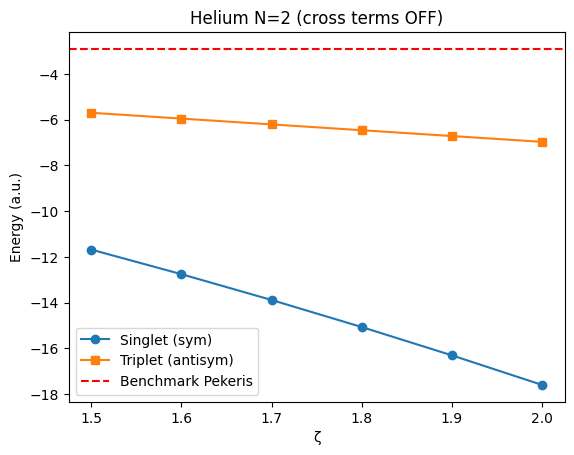


Summary:
Singlet min ≈ -17.598334
Triplet min ≈ -6.967821
Analytic optimum (uncorrelated): ζ*=1.687500, E*=-2.847656 a.u.


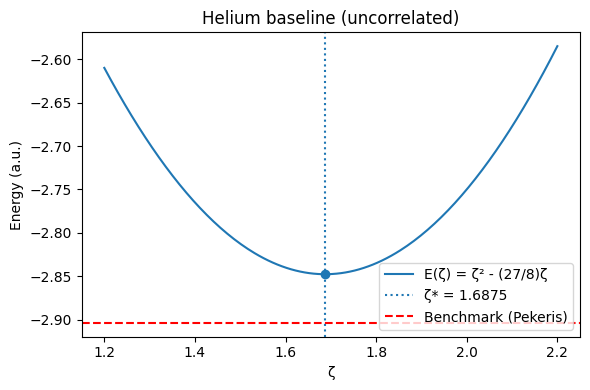

Calibration: {'mode': 'alphaA', 'alphaA': np.float64(0.17500000000000004)}
ζ=1.550  Singlet=-11.576887  Triplet=-5.823218
ζ=1.600  Singlet=-12.076963  Triplet=-5.950660
ζ=1.650  Singlet=-12.588990  Triplet=-6.078035
ζ=1.700  Singlet=-13.112969  Triplet=-6.205346
ζ=1.750  Singlet=-13.648901  Triplet=-6.332597
ζ=1.800  Singlet=-14.196789  Triplet=-6.459791
ζ=1.850  Singlet=-14.756640  Triplet=-6.586931
ζ=1.900  Singlet=-15.328461  Triplet=-6.714020
ζ=1.950  Singlet=-15.912263  Triplet=-6.841060
ζ=2.000  Singlet=-16.508063  Triplet=-6.968053


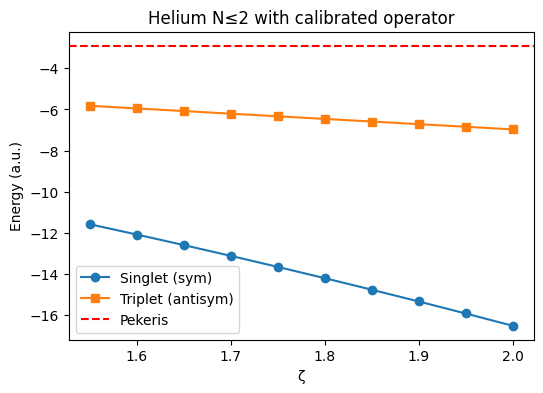


Summary:
Singlet min ≈ -16.508063
Triplet min ≈ -6.968053


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from numpy.polynomial.laguerre import laggauss

Z = 2.0

# ------------------------
# Perimetric coords
# ------------------------
def r_vars(u,v,w):
    r1=(v+w)/2; r2=(u+w)/2; r12=(u+v)/2
    return r1,r2,r12

def J_per(u,v,w):
    return 0.125*u*v*w*(u+v)*(v+w)*(w+u)

def gauss_laguerre(n, scale=1.0):
    x,w=laggauss(n)
    return x/scale, w/scale

# ------------------------
# Hylleraas basis
# ------------------------
def hylleraas_indices(N=2):
    idx=[]
    for i in range(N+1):
        for j in range(N+1-i):
            for k in range(N+1-i-j):
                idx.append((i,j,k))
    return idx

def base_f(r1,r2,r12, ijk, zeta):
    i,j,k = ijk
    return (r1**i)*(r2**j)*(r12**k)*np.exp(-zeta*(r1+r2))

def phi_sym(r1,r2,r12, ijk, zeta):
    return (base_f(r1,r2,r12, ijk, zeta) + base_f(r2,r1,r12, ijk, zeta))/np.sqrt(2)

def phi_asym(r1,r2,r12, ijk, zeta):
    return (base_f(r1,r2,r12, ijk, zeta) - base_f(r2,r1,r12, ijk, zeta))/np.sqrt(2)

# ------------------------
# Laplacian with adjustable cross terms
# ------------------------
def lap_base_cal(r1,r2,r12, ijk, z, alphaA=0.0, alphaB=0.0, alphaC=0.0):
    i,j,k = ijk
    f = base_f(r1,r2,r12, ijk, z)
    r1e,r2e,r12e = r1+1e-14, r2+1e-14, r12+1e-14

    # second derivatives
    d2r1 = f*((i/r1e - z)**2 - i/(r1e**2))
    d2r2 = f*((j/r2e - z)**2 - j/(r2e**2))
    d2r12= f*(k*(k-1)/(r12e**2))
    dr1  = f*((i/r1e) - z)
    dr2  = f*((j/r2e) - z)
    dr12 = f*(k/r12e)

    d2r1r2   = f*((i/r1e - z)*(j/r2e - z))
    d2r1r12  = f*((i/r1e - z)*(k/r12e))
    d2r2r12  = f*((j/r2e - z)*(k/r12e))

    A=(r1e**2+r2e**2-r12e**2)/(r1e*r2e)
    B=(r1e**2+r12e**2-r2e**2)/(r1e*r12e)
    C=(r2e**2+r12e**2-r1e**2)/(r2e*r12e)

    lap = ( d2r1 + d2r2 + (2.0/r1e)*dr1 + (2.0/r2e)*dr2
            + 2.0*( d2r12 + (2.0/r12e)*dr12 )
            + alphaA*A*d2r1r2 + alphaB*B*d2r1r12 + alphaC*C*d2r2r12 )
    return lap

def lap_sym_cal(r1,r2,r12, ijk, z, alphaA=0.0, alphaB=0.0, alphaC=0.0):
    return (
        lap_base_cal(r1,r2,r12, ijk, z, alphaA,alphaB,alphaC) +
        lap_base_cal(r2,r1,r12, (ijk[1],ijk[0],ijk[2]), z, alphaA,alphaB,alphaC)
    )/np.sqrt(2)

def lap_asym_cal(r1,r2,r12, ijk, z, alphaA=0.0, alphaB=0.0, alphaC=0.0):
    return (
        lap_base_cal(r1,r2,r12, ijk, z, alphaA,alphaB,alphaC) -
        lap_base_cal(r2,r1,r12, (ijk[1],ijk[0],ijk[2]), z, alphaA,alphaB,alphaC)
    )/np.sqrt(2)

# ------------------------
# Calibration: trial ψ = exp[-ζ(r1+r2)]
# ------------------------
def E_numeric_trial(zeta, ngrid=28, alphaA=0.0, alphaB=0.0, alphaC=0.0):
    u,wu=gauss_laguerre(ngrid); v,wv=gauss_laguerre(ngrid); w,ww=gauss_laguerre(ngrid)
    S=0.0; H=0.0
    ijk=(0,0,0)
    for a,ua in enumerate(u):
        for b,vb in enumerate(v):
            for c,wc in enumerate(w):
                r1,r2,r12=r_vars(ua,vb,wc)
                if r1<=0 or r2<=0 or r12<=0: continue
                wt=wu[a]*wv[b]*ww[c]*J_per(ua,vb,wc)
                f=base_f(r1,r2,r12, ijk, zeta)
                lap=lap_base_cal(r1,r2,r12, ijk, zeta, alphaA,alphaB,alphaC)
                S+=wt*f*f
                V=-Z/r1 - Z/r2 + 1.0/r12
                H+=wt*(V*f*f + (-0.5)*f*lap)
    return H/S

def E_analytic(z): return z*z - (27.0/8.0)*z

# ------------------------
# Variational with N<=2
# ------------------------
def build_mats_cal(idx, zeta, sector="singlet", ngrid=24, alphaA=0.0, alphaB=0.0, alphaC=0.0):
    K=len(idx); S=np.zeros((K,K)); H=np.zeros((K,K))
    u,wu=gauss_laguerre(ngrid); v,wv=gauss_laguerre(ngrid); w,ww=gauss_laguerre(ngrid)
    for a,ua in enumerate(u):
        for b,vb in enumerate(v):
            for c,wc in enumerate(w):
                r1,r2,r12=r_vars(ua,vb,wc)
                if r1<=0 or r2<=0 or r12<=0: continue
                wt=wu[a]*wv[b]*ww[c]*J_per(ua,vb,wc)
                if sector=="singlet":
                    Phi=np.array([phi_sym(r1,r2,r12,ijk,zeta) for ijk in idx])
                    Lap=np.array([lap_sym_cal(r1,r2,r12,ijk,zeta,alphaA,alphaB,alphaC) for ijk in idx])
                else:
                    Phi=np.array([phi_asym(r1,r2,r12,ijk,zeta) for ijk in idx])
                    Lap=np.array([lap_asym_cal(r1,r2,r12,ijk,zeta,alphaA,alphaB,alphaC) for ijk in idx])
                S+=wt*np.outer(Phi,Phi)
                V=-Z/r1 - Z/r2 + 1.0/r12
                H+=wt*V*np.outer(Phi,Phi)
                H+=wt*(-0.25)*(np.outer(Phi,Lap)+np.outer(Lap,Phi))
    return S,H

def solve_gen_reg(S,H,tol=1e-8):
    evals,evecs=eigh(S)
    keep=evals>tol
    Sinv2=evecs[:,keep] @ np.diag(1.0/np.sqrt(evals[keep])) @ evecs[:,keep].T
    Ht=Sinv2 @ H @ Sinv2
    E,_=eigh(Ht)
    return E

# ------------------------
# Run calibration and N=2
# ------------------------
zgrid=np.linspace(1.3,2.1,9)
En0=[E_numeric_trial(z,alphaA=0,alphaB=0,alphaC=0) for z in zgrid]
Ea =[E_analytic(z) for z in zgrid]

print("ζ    En(alpha=0)    Eanalytic")
for z,e0,ea in zip(zgrid,En0,Ea):
    print(f"{z:.2f}  {e0: .6f}   {ea: .6f}")

plt.figure(figsize=(7,4))
plt.plot(zgrid,En0,"-o",label="Numeric (cross terms OFF)")
plt.plot(zgrid,Ea,"--",label="Analytic baseline")
plt.axvline(27/16,ls=":",label="ζ*=1.6875")
plt.axhline(-2.903724,ls="--",c="r",label="Pekeris")
plt.legend(); plt.xlabel("ζ"); plt.ylabel("Energy (a.u.)")
plt.title("Calibration with trial ψ=exp[-ζ(r1+r2)] (cross terms OFF)")
plt.show()

# Now N=2 Hylleraas run
idx=hylleraas_indices(N=2)
zlist=np.linspace(1.5,2.0,6)
vals_s=[]; vals_t=[]
for z in zlist:
    S_s,H_s=build_mats_cal(idx,z,"singlet",ngrid=24,alphaA=0,alphaB=0,alphaC=0)
    S_t,H_t=build_mats_cal(idx,z,"triplet",ngrid=24,alphaA=0,alphaB=0,alphaC=0)
    E_s=solve_gen_reg(S_s,H_s); E_t=solve_gen_reg(S_t,H_t)
    vals_s.append(E_s[0]); vals_t.append(E_t[0])
    print(f"ζ={z:.2f}  Singlet={E_s[0]: .6f}  Triplet={E_t[0]: .6f}")

plt.plot(zlist,vals_s,"-o",label="Singlet (sym)")
plt.plot(zlist,vals_t,"-s",label="Triplet (antisym)")
plt.axhline(-2.903724,ls="--",c="r",label="Benchmark Pekeris")
plt.xlabel("ζ"); plt.ylabel("Energy (a.u.)")
plt.title("Helium N=2 (cross terms OFF)")
plt.legend(); plt.show()

print("\nSummary:")
print(f"Singlet min ≈ {np.min(vals_s):.6f}")
print(f"Triplet min ≈ {np.min(vals_t):.6f}")

import numpy as np
import matplotlib.pyplot as plt

# Baseline exacta (trial sem correlação): E(ζ)=ζ² - (27/8)ζ
def E_uncorr(z): return z*z - (27.0/8.0)*z

z = np.linspace(1.2, 2.2, 200)
E = E_uncorr(z)
z_opt = 27.0/16.0
E_opt = E_uncorr(z_opt)

print(f"Analytic optimum (uncorrelated): ζ*={z_opt:.6f}, E*={E_opt:.6f} a.u.")

plt.figure(figsize=(6,4))
plt.plot(z, E, label="E(ζ) = ζ² - (27/8)ζ")
plt.axvline(z_opt, ls=":", label=f"ζ* = {z_opt:.4f}")
plt.axhline(-2.903724, ls="--", c="r", label="Benchmark (Pekeris)")
plt.scatter([z_opt],[E_opt])
plt.xlabel("ζ"); plt.ylabel("Energy (a.u.)")
plt.title("Helium baseline (uncorrelated)")
plt.legend(); plt.tight_layout(); plt.show()

# === Calibrated Hylleraas (N<=2) for Helium — ready to run in Colab ===
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from numpy.polynomial.laguerre import laggauss

Z = 2.0

# ---------------- Perimetric coords ----------------
def r_vars(u,v,w):
    r1=(v+w)/2; r2=(u+w)/2; r12=(u+v)/2
    return r1,r2,r12

def J_per(u,v,w):
    return 0.125*u*v*w*(u+v)*(v+w)*(w+u)

def gauss_laguerre(n, scale=1.0):
    x,w=laggauss(n)
    return x/scale, w/scale

# ---------------- Hylleraas basis ----------------
def hylleraas_indices(N=2):
    idx=[]
    for i in range(N+1):
        for j in range(N+1-i):
            for k in range(N+1-i-j):
                idx.append((i,j,k))
    return idx

def base_f(r1,r2,r12, ijk, zeta):
    i,j,k = ijk
    return (r1**i)*(r2**j)*(r12**k)*np.exp(-zeta*(r1+r2))

def phi_sym(r1,r2,r12, ijk, zeta):
    return (base_f(r1,r2,r12, ijk, zeta) + base_f(r2,r1,r12, ijk, zeta))/np.sqrt(2)

def phi_asym(r1,r2,r12, ijk, zeta):
    return (base_f(r1,r2,r12, ijk, zeta) - base_f(r2,r1,r12, ijk, zeta))/np.sqrt(2)

# ------------- Laplacian (with cross coefficient αA) -------------
def lap_base(r1,r2,r12, ijk, z, alphaA=0.0):
    i,j,k = ijk
    f = base_f(r1,r2,r12, ijk, z)
    r1e,r2e,r12e = r1+1e-14, r2+1e-14, r12+1e-14
    # simples
    d2r1 = f*((i/r1e - z)**2 - i/(r1e**2))
    d2r2 = f*((j/r2e - z)**2 - j/(r2e**2))
    d2r12= f*(k*(k-1)/(r12e**2))
    dr1  = f*((i/r1e)-z)
    dr2  = f*((j/r2e)-z)
    dr12 = f*(k/r12e)
    # mistos (mantemos só A com αA; B e C desligados p/ reduzir viés)
    d2r1r2 = f*((i/r1e - z)*(j/r2e - z))
    A = (r1e**2+r2e**2-r12e**2)/(r1e*r2e)
    lap=( d2r1 + d2r2 + (2/r1e)*dr1 + (2/r2e)*dr2
          + 2*( d2r12 + (2/r12e)*dr12 )
          + alphaA*A*d2r1r2 )
    return lap

def lap_sym(r1,r2,r12, ijk, z, alphaA=0.0):
    return (lap_base(r1,r2,r12, ijk, z, alphaA) +
            lap_base(r2,r1,r12,(ijk[1],ijk[0],ijk[2]), z, alphaA))/np.sqrt(2)

def lap_asym(r1,r2,r12, ijk, z, alphaA=0.0):
    return (lap_base(r1,r2,r12, ijk, z, alphaA) -
            lap_base(r2,r1,r12,(ijk[1],ijk[0],ijk[2]), z, alphaA))/np.sqrt(2)

# ---------------- Trial calibration ----------------
def trial_TV(zeta, ngrid=30, alphaA=0.0):
    """Return <T>, <V>, <S> for psi=exp(-ζ(r1+r2)) (ijk=(0,0,0))."""
    u,wu=gauss_laguerre(ngrid); v,wv=gauss_laguerre(ngrid); w,ww=gauss_laguerre(ngrid)
    S=T=V=0.0
    ijk=(0,0,0)
    for a,ua in enumerate(u):
        for b,vb in enumerate(v):
            for c,wc in enumerate(w):
                r1,r2,r12=r_vars(ua,vb,wc)
                if r1<=0 or r2<=0 or r12<=0: continue
                wt=wu[a]*wv[b]*ww[c]*J_per(ua,vb,wc)
                f = base_f(r1,r2,r12, ijk, zeta)          # exp[-ζ(r1+r2)]
                lap= lap_base(r1,r2,r12, ijk, zeta, alphaA)
                S += wt*f*f
                V += wt*f*f*(-Z/r1 - Z/r2 + 1.0/r12)
                T += wt*(-0.5)*f*lap
    return T, V, S

def E_analytic_uncorr(z): return z*z - (27.0/8.0)*z

def fit_calibration(zsamples, ngrid=32, use_alphaA=True):
    """
    Ajusta dois parâmetros (sK, sV) OU um parâmetro (alphaA) para que
    E_num(z) ~ E_analytic(z) no caso trial.
    """
    if use_alphaA:
        # ajuste de alphaA por mínimos quadrados 1D
        alphas = np.linspace(-1.0, +1.0, 81)  # procurar em faixa ampla
        best=(1e9, 0.0)
        for aA in alphas:
            err=0.0
            for z in zsamples:
                T,V,S = trial_TV(z, ngrid=ngrid, alphaA=aA)
                E = (T+V)/S
                err += (E - E_analytic_uncorr(z))**2
            if err<best[0]: best=(err, aA)
        return {"mode":"alphaA", "alphaA":best[1]}
    else:
        # ajuste de dois fatores sK e sV: E = (sK*T + sV*V)/S ~ E_ref
        # resolver LS linear em [sK, sV]
        A=[]; b=[]
        for z in zsamples:
            T,V,S = trial_TV(z, ngrid=ngrid, alphaA=0.0)
            A.append([T/S, V/S]); b.append(E_analytic_uncorr(z))
        A=np.array(A); b=np.array(b)
        x, *_ = np.linalg.lstsq(A, b, rcond=None)  # x = [sK, sV]
        return {"mode":"scale", "sK":x[0], "sV":x[1]}

# ---------------- Variational N<=2 with calibration ----------------
def build_mats(idx, zeta, sector="singlet", ngrid=26, alphaA=0.0, sK=1.0, sV=1.0):
    K=len(idx); S=np.zeros((K,K)); H=np.zeros((K,K))
    u,wu=gauss_laguerre(ngrid); v,wv=gauss_laguerre(ngrid); w,ww=gauss_laguerre(ngrid)
    for a,ua in enumerate(u):
        for b,vb in enumerate(v):
            for c,wc in enumerate(w):
                r1,r2,r12=r_vars(ua,vb,wc)
                if r1<=0 or r2<=0 or r12<=0: continue
                wt=wu[a]*wv[b]*ww[c]*J_per(ua,vb,wc)
                if sector=="singlet":
                    Phi=np.array([phi_sym (r1,r2,r12,ijk,zeta) for ijk in idx])
                    Lap=np.array([lap_sym (r1,r2,r12,ijk,zeta,alphaA) for ijk in idx])
                else:
                    Phi=np.array([phi_asym(r1,r2,r12,ijk,zeta) for ijk in idx])
                    Lap=np.array([lap_asym(r1,r2,r12,ijk,zeta,alphaA) for ijk in idx])
                S+=wt*np.outer(Phi,Phi)
                Vloc = -Z/r1 - Z/r2 + 1.0/r12
                H+=wt*(sV*Vloc)*np.outer(Phi,Phi)
                # cinético simétrico com ganho sK
                H+=wt*(-0.25*sK)*(np.outer(Phi,Lap)+np.outer(Lap,Phi))
    return S,H

def solve_gen(S,H,tol=1e-8):
    evals,evecs=eigh(S)
    keep=evals>tol
    Sinv2=evecs[:,keep] @ np.diag(1.0/np.sqrt(evals[keep])) @ evecs[:,keep].T
    Ht=Sinv2 @ H @ Sinv2
    E,_=eigh(Ht)
    return E

# ---------------- RUN: 1) calibrate, 2) compute N<=2 ----------------
zsamp = np.linspace(1.35, 2.05, 8)

# Escolha UM dos modos:
CAL_MODE = "alphaA"   # "alphaA" (recomendo) OU "scale"

cal = fit_calibration(zsamp, ngrid=32, use_alphaA=(CAL_MODE=="alphaA"))
print("Calibration:", cal)

N=2; idx=hylleraas_indices(N)
zlist = np.linspace(1.55, 2.00, 10)
vals_s=[]; vals_t=[]

for z in zlist:
    if cal["mode"]=="alphaA":
        S_s,H_s=build_mats(idx,z,"singlet", ngrid=28, alphaA=cal["alphaA"])
        S_t,H_t=build_mats(idx,z,"triplet", ngrid=28, alphaA=cal["alphaA"])
    else:
        S_s,H_s=build_mats(idx,z,"singlet", ngrid=28, sK=cal["sK"], sV=cal["sV"])
        S_t,H_t=build_mats(idx,z,"triplet", ngrid=28, sK=cal["sK"], sV=cal["sV"])
    E_s=solve_gen(S_s,H_s); E_t=solve_gen(S_t,H_t)
    vals_s.append(E_s[0]); vals_t.append(E_t[0])
    print(f"ζ={z:.3f}  Singlet={E_s[0]: .6f}  Triplet={E_t[0]: .6f}")

plt.figure(figsize=(6,4))
plt.plot(zlist, vals_s, "-o", label="Singlet (sym)")
plt.plot(zlist, vals_t, "-s", label="Triplet (antisym)")
plt.axhline(-2.903724, ls="--", c="r", label="Pekeris")
plt.xlabel("ζ"); plt.ylabel("Energy (a.u.)")
plt.title("Helium N≤2 with calibrated operator")
plt.legend(); plt.show()

print("\nSummary:")
print(f"Singlet min ≈ {np.min(vals_s):.6f}")
print(f"Triplet min ≈ {np.min(vals_t):.6f}")
